In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv('Cleaned_data.csv')

In [4]:
df.head()

,Index,Film_ID,Type_Of_Entertainment,Title,Director,Casts,Country,Added_on_site,Film_Releasing_Year,Film_Rating,Duration_Of_Film,Genres,Description,Year_Added,Month_Added,Duration_Number,Is_TV_Show
0,1,s7059,Movie,Immoral Tales,Walerian Borowczyk,"Lise Danvers, Fabrice Luchini, Charlotte Alexa...",France,6/6/2019,1974,UR,103.0,"['Dramas', 'International Movies', 'Romantic M...",This anthology illustrates the timeless nature...,2019.0,6.0,103.0,0
1,2,s8791,Movie,You Don't Mess with the Zohan,Dennis Dugan,"Adam Sandler, John Turturro, Emmanuelle Chriqu...",United States,9/1/2019,2008,UR,113.0,"['Action & Adventure', 'Comedies']",An Israeli counterterrorism soldier with a sec...,2019.0,9.0,113.0,0
2,3,s7989,Movie,Sex Doll,Sylvie Verheyde,"Hafsia Herzi, Ash Stymest, Karole Rocher, Paul...","United Kingdom, France",7/10/2017,2016,UR,103.0,"['Dramas', 'International Movies', 'Romantic M...",A high-end call girl falls for a handsome man ...,2017.0,7.0,103.0,0
3,4,s6582,Movie,Dear Dracula,Chad Van De Keere,"Nathan Gamble, Ray Liotta, Emilio Estevez, Ari...",United States,2/18/2016,2012,TV-Y7-FV,43.0,"['Children & Family Movies', 'Comedies']",When he gets a fan letter from a young monster...,2016.0,2.0,43.0,0
4,5,s7293,Movie,Leo the Lion,Mario Cambi,"Daniel Amerman, John Cygan, Matthew Mercer, Am...","United States, Italy",12/20/2015,2013,TV-Y7-FV,78.0,"['Children & Family Movies', 'Comedies']",Eschewing the carnivorous ways of his fellow l...,2015.0,12.0,78.0,0


In [5]:
numeric_cols = df.select_dtypes(include='number')  # picks numeric columns automatically
correlation_matrix = numeric_cols.corr()
print(correlation_matrix)


                        Index  Film_Releasing_Year  Duration_Of_Film  \
Index                1.000000            -0.210266          0.342029   
Film_Releasing_Year -0.210266             1.000000         -0.249182   
Duration_Of_Film     0.342029            -0.249182          1.000000   
Year_Added           0.143170             0.110473          0.016436   
Month_Added         -0.037612            -0.039316         -0.016876   
Duration_Number      0.342029            -0.249182          1.000000   
Is_TV_Show          -0.261375             0.181710         -0.885421   

                     Year_Added  Month_Added  Duration_Number  Is_TV_Show  
Index                  0.143170    -0.037612         0.342029   -0.261375  
Film_Releasing_Year    0.110473    -0.039316        -0.249182    0.181710  
Duration_Of_Film       0.016436    -0.016876         1.000000   -0.885421  
Year_Added             1.000000    -0.160555         0.016436    0.038007  
Month_Added           -0.160555     1.00000

In [8]:
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

C:\Users\User\AppData\Local\Temp\ipykernel_10772\3851962713.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Type_Of_Entertainment', palette='Set2')


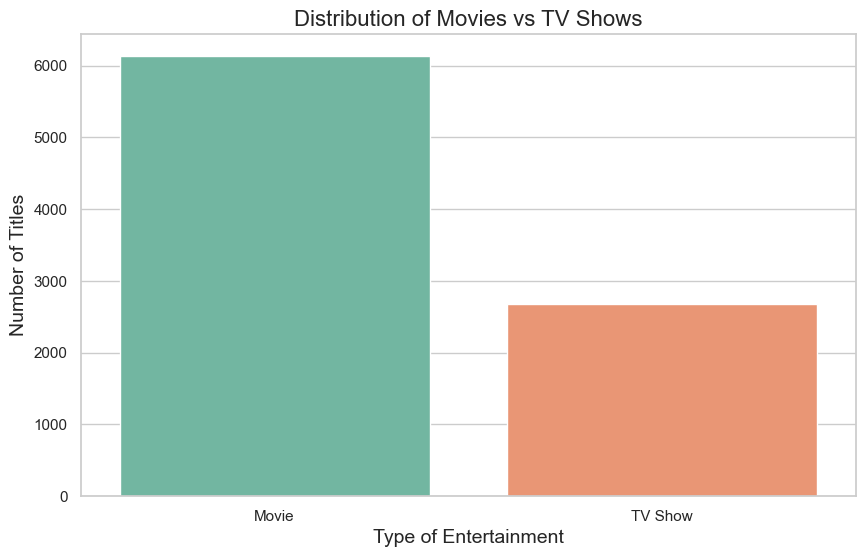

<Figure size 1000x600 with 0 Axes>

In [27]:
# 1. Distribution of Content
plt.Figure(figsize=(8,5))
sns.countplot(data=df, x='Type_Of_Entertainment', palette='Set2')
plt.title("Distribution of Movies vs TV Shows")
plt.ylabel("Number of Titles")
plt.xlabel("Type of Entertainment")
plt.show()
plt.savefig('movies_vs_tv_shows.png', dpi=300, bbox_inches='tight')

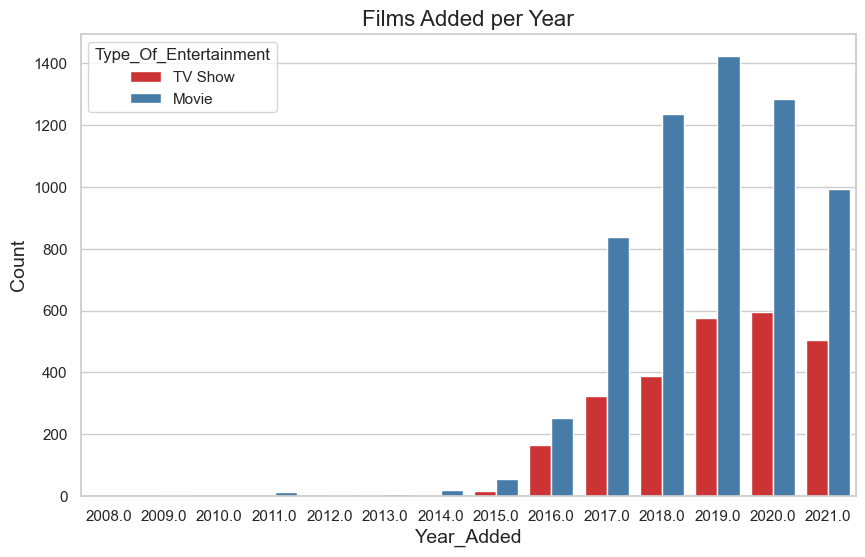

<Figure size 1000x600 with 0 Axes>

In [28]:
# 2. Films Added Over Time
sns.countplot(data=df, x='Year_Added', hue='Type_Of_Entertainment', palette='Set1')
plt.title('Films Added per Year')
plt.ylabel('Count')
plt.show()
plt.savefig('films_added_over_time.png', dpi=300, bbox_inches='tight')

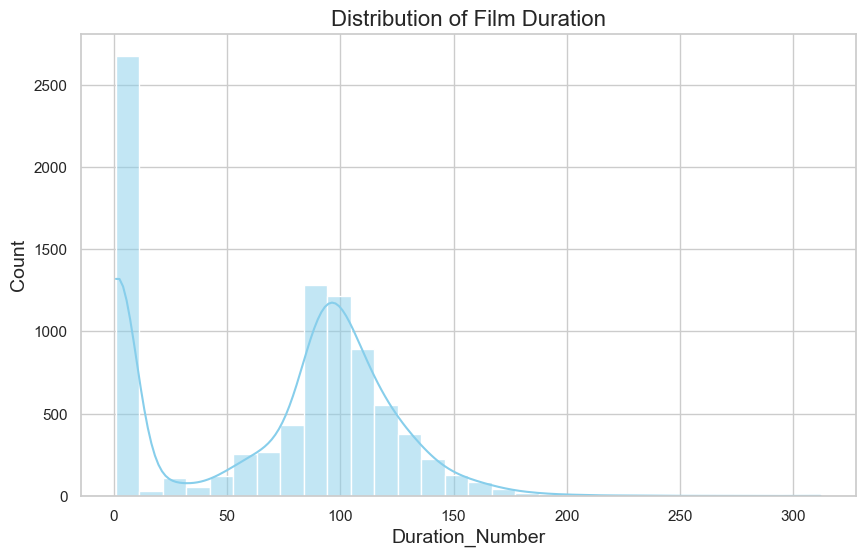

<Figure size 1000x600 with 0 Axes>

In [29]:
# Step 3: Duration Analysis
sns.histplot(data=df,x='Duration_Number',bins=30,kde=True,color='skyblue')
plt.title('Distribution of Film Duration')
plt.show()
plt.savefig('duration_distribution.png', dpi=300, bbox_inches='tight')

C:\Users\User\AppData\Local\Temp\ipykernel_10772\2267498884.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Is_TV_Show', y='Duration_Number', palette='Set3')


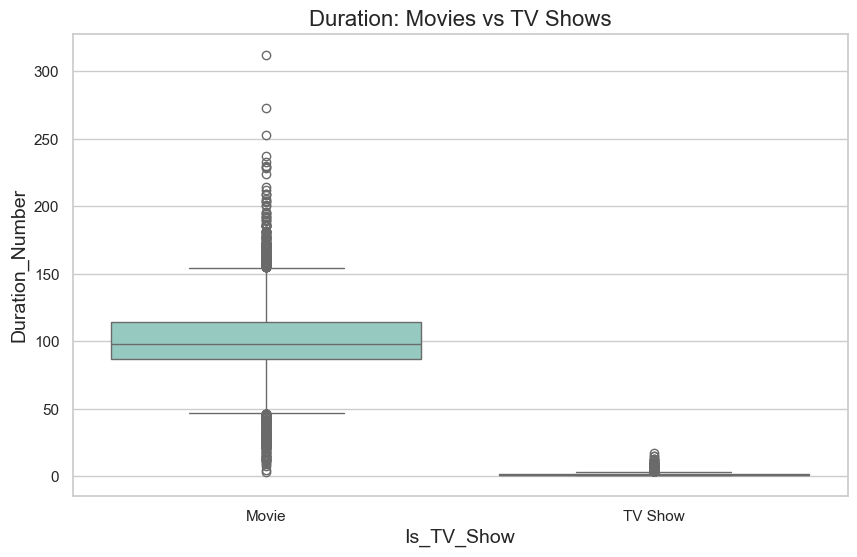

<Figure size 1000x600 with 0 Axes>

In [30]:
# Boxplot Movies vs TV Shows
sns.boxplot(data=df, x='Is_TV_Show', y='Duration_Number', palette='Set3')
plt.xticks([0,1], ['Movie','TV Show'])
plt.title('Duration: Movies vs TV Shows')
plt.show()
plt.savefig('duration_comparison.png', dpi=300, bbox_inches='tight')

C:\Users\User\AppData\Local\Temp\ipykernel_10772\2245446203.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=[g[0] for g in top_genres], y=[g[1] for g in top_genres], palette='viridis')


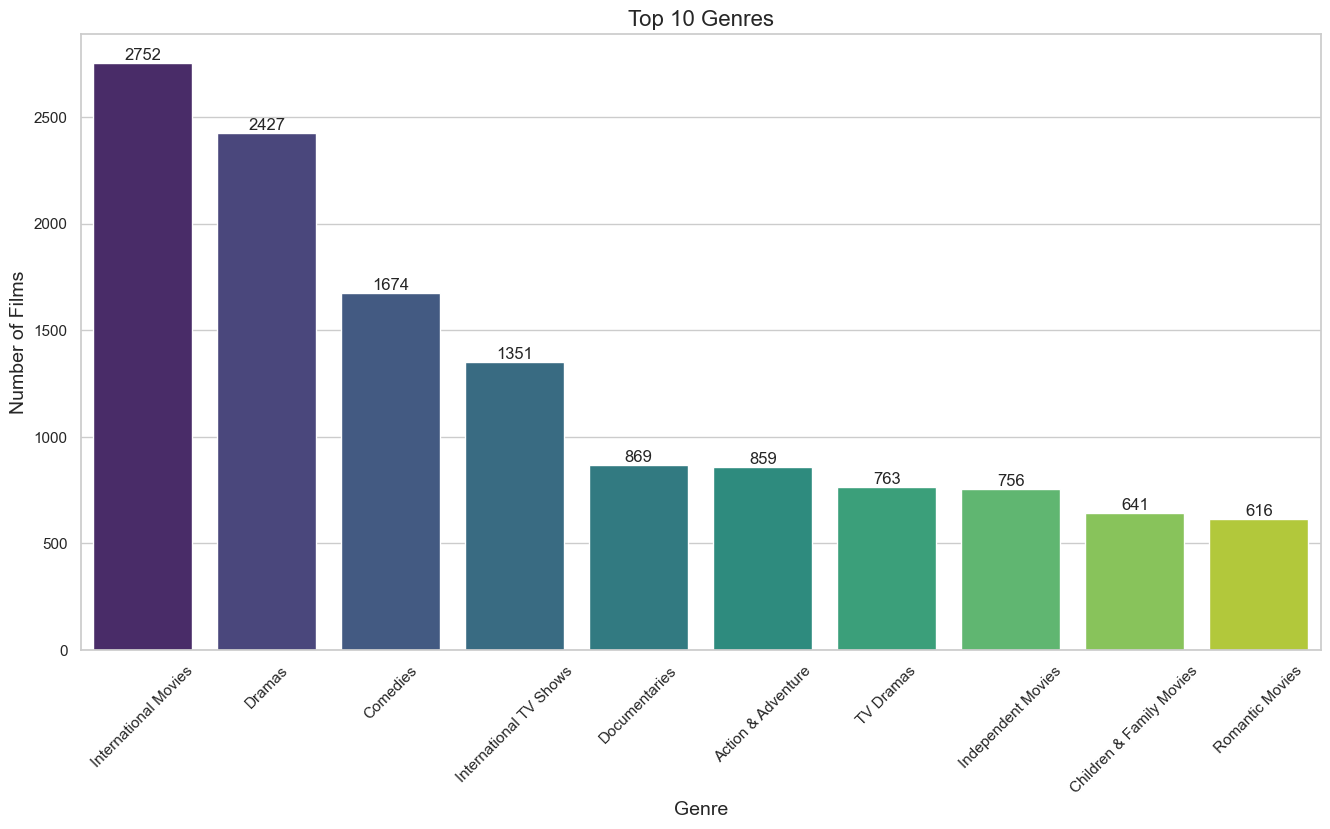

In [33]:
from collections import Counter

# Flatten the list of genres
all_genres = [g for sublist in df['Genres'] for g in sublist]

# Count top 10 genres
top_genres = Counter(all_genres).most_common(10)

# Plot
plt.figure(figsize=(16,8))
ax = sns.barplot(x=[g[0] for g in top_genres], y=[g[1] for g in top_genres], palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Genres')
plt.ylabel('Number of Films')
plt.xlabel('Genre')

# Add counts on top of bars
for i, v in enumerate([g[1] for g in top_genres]):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=12)

# Save plot
plt.savefig('top_genres.png', dpi=300, bbox_inches='tight')
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_10772\843024427.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='coolwarm')


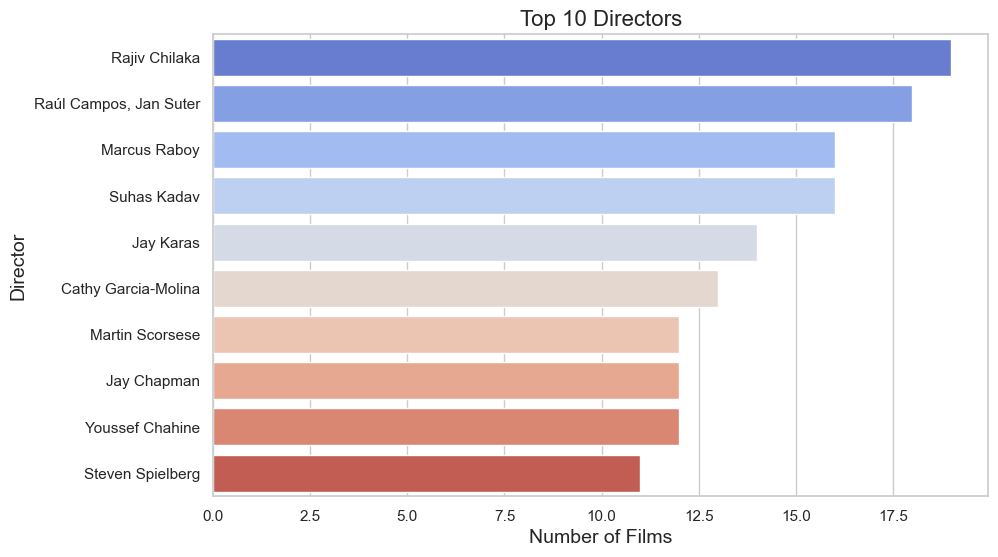

<Figure size 1000x600 with 0 Axes>

In [34]:
# Count directors
director_counts = df['Director'].value_counts()

# Exclude 'Unknown'
director_counts = director_counts[director_counts.index != 'Unknown']

# Take top 10 directors after filtering
top_directors = director_counts.head(10)

# Plot
sns.barplot(x=top_directors.values, y=top_directors.index, palette='coolwarm')
plt.title('Top 10 Directors')
plt.xlabel('Number of Films')
plt.ylabel('Director')
plt.show()
plt.savefig('top_directors.png', dpi=300, bbox_inches='tight')


C:\Users\User\AppData\Local\Temp\ipykernel_10772\1380563618.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')


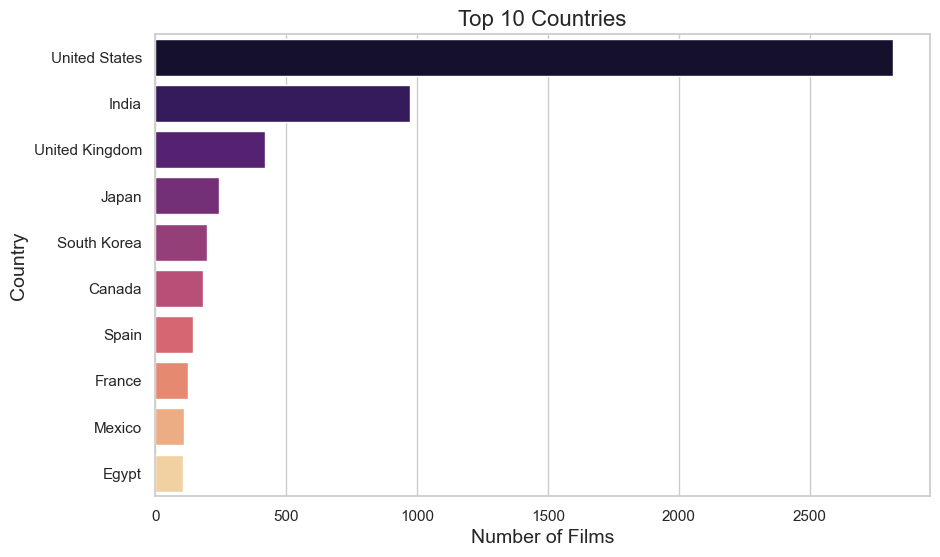

<Figure size 1000x600 with 0 Axes>

In [35]:
# Count countries
country_counts = df['Country'].value_counts()

# Exclude 'Unknown'
country_counts = country_counts[country_counts.index != 'Unknown']

# Take top 10 after filtering
top_countries = country_counts.head(10)

# Plot
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title('Top 10 Countries')
plt.xlabel('Number of Films')
plt.ylabel('Country')
plt.show()
plt.savefig('top_countries.png', dpi=300, bbox_inches='tight')


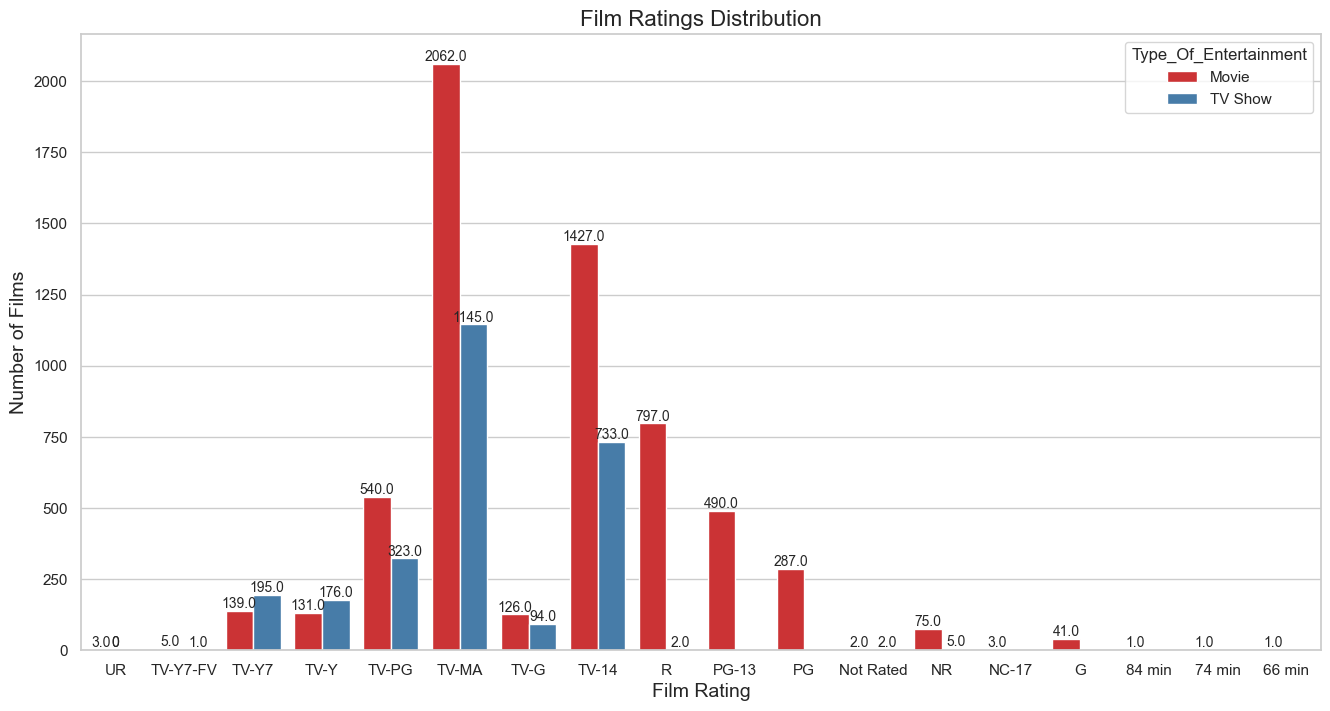

<Figure size 1000x600 with 0 Axes>

In [36]:
plt.figure(figsize=(16,8))  # make figure wider
ax = sns.countplot(data=df, x='Film_Rating', hue='Type_Of_Entertainment', palette='Set1')
plt.title('Film Ratings Distribution')
plt.xlabel('Film Rating')
plt.ylabel('Number of Films')

# Add counts on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.show()
plt.savefig('film_ratings_distribution.png', dpi=300, bbox_inches='tight')



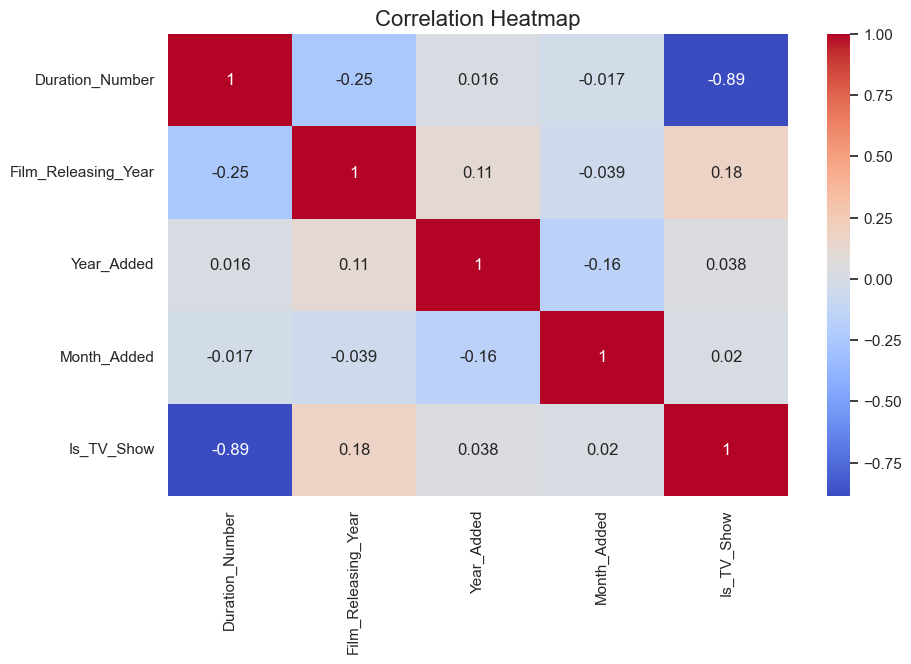

In [ ]:
numeric_cols = ['Duration_Number', 'Film_Releasing_Year', 'Year_Added', 'Month_Added', 'Is_TV_Show']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
plt.savefig('Correlation.png', dpi=300, bbox_inches='tight')


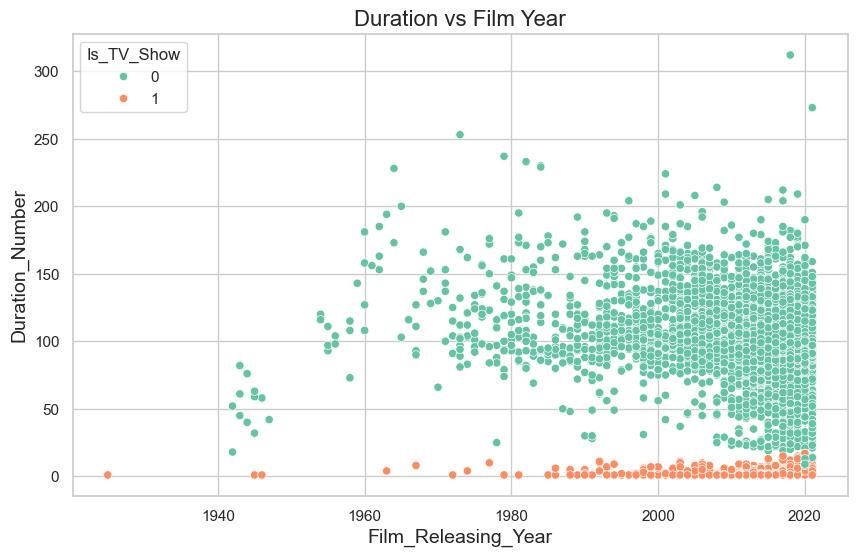

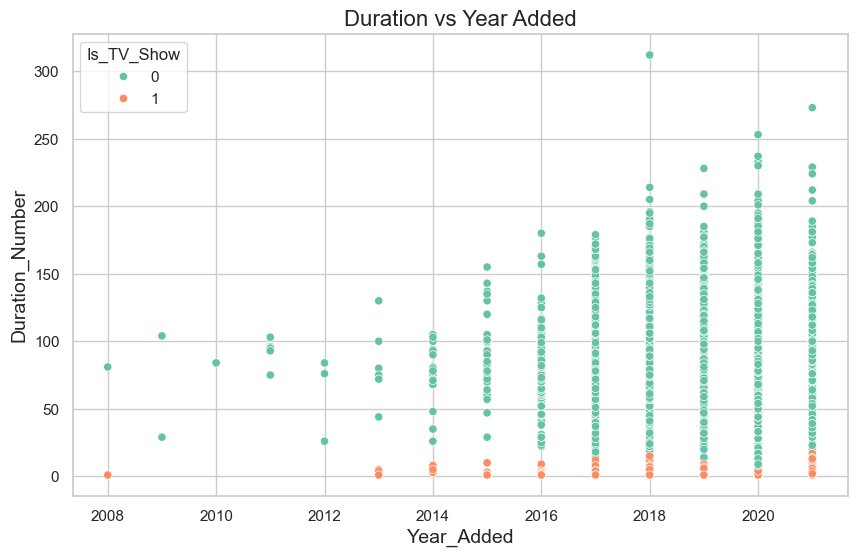

<Figure size 1000x600 with 0 Axes>

In [37]:
sns.scatterplot(data=df, x='Film_Releasing_Year', y='Duration_Number', hue='Is_TV_Show', palette='Set2')
plt.title('Duration vs Film Year')
plt.show()
plt.savefig('Duration vs Film Year.png', dpi=300, bbox_inches='tight')
sns.scatterplot(data=df, x='Year_Added', y='Duration_Number', hue='Is_TV_Show', palette='Set2')
plt.title('Duration vs Year Added')
plt.show()
plt.savefig('Duration vs Year Added.png', dpi=300, bbox_inches='tight')

In [38]:
# 1. Movies vs TV Shows
# -------------------------------
plt.figure(figsize=(16,8))
ax = sns.countplot(data=df, x='Type_Of_Entertainment', palette='Set2')
plt.title('Movies vs TV Shows')
plt.ylabel('Number of Films')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=12)
plt.savefig('movies_vs_tv_shows.png', dpi=300, bbox_inches='tight')
plt.close()

# -------------------------------
# 2. Films Added Over Time
# -------------------------------
plt.figure(figsize=(16,8))
ax = sns.countplot(data=df, x='Year_Added', hue='Type_Of_Entertainment', palette='Set1')
plt.title('Films Added per Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Films')
plt.savefig('films_added_over_time.png', dpi=300, bbox_inches='tight')
plt.close()

# -------------------------------
# 3. Duration Distribution
# -------------------------------
plt.figure(figsize=(16,8))
sns.histplot(df, x='Duration_Number', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Film Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.savefig('duration_distribution.png', dpi=300, bbox_inches='tight')
plt.close()

# Boxplot: Movies vs TV Shows
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=df, x='Is_TV_Show', y='Duration_Number', palette='Set3')
plt.xticks([0,1], ['Movie','TV Show'])
plt.title('Duration: Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Duration (minutes)')
plt.savefig('duration_comparison.png', dpi=300, bbox_inches='tight')
plt.close()

# -------------------------------
# 4. Top Genres
# -------------------------------
all_genres = [g for sublist in df['Genres'] for g in sublist]
top_genres = Counter(all_genres).most_common(10)

plt.figure(figsize=(16,8))
ax = sns.barplot(x=[g[0] for g in top_genres], y=[g[1] for g in top_genres], palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Genres')
plt.ylabel('Number of Films')
plt.xlabel('Genre')
for i, v in enumerate([g[1] for g in top_genres]):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=12)
plt.savefig('top_genres.png', dpi=300, bbox_inches='tight')
plt.close()

# -------------------------------
# 5. Top Directors
# -------------------------------
director_counts = df['Director'].value_counts()
director_counts = director_counts[director_counts.index != 'Unknown']
top_directors = director_counts.head(10)

plt.figure(figsize=(16,8))
ax = sns.barplot(x=top_directors.values, y=top_directors.index, palette='coolwarm')
plt.title('Top 10 Directors (Excluding Unknown)')
plt.xlabel('Number of Films')
plt.ylabel('Director')
for i, v in enumerate(top_directors.values):
    plt.text(v + 1, i, str(v), color='black', va='center', fontsize=12)
plt.savefig('top_directors.png', dpi=300, bbox_inches='tight')
plt.close()

# -------------------------------
# 6. Top Countries
# -------------------------------
country_counts = df['Country'].value_counts()
country_counts = country_counts[country_counts.index != 'Unknown']
top_countries = country_counts.head(10)

plt.figure(figsize=(16,8))
ax = sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title('Top 10 Countries (Excluding Unknown)')
plt.xlabel('Number of Films')
plt.ylabel('Country')
for i, v in enumerate(top_countries.values):
    plt.text(v + 1, i, str(v), color='black', va='center', fontsize=12)
plt.savefig('top_countries.png', dpi=300, bbox_inches='tight')
plt.close()

# -------------------------------
# 7. Film Ratings Distribution
# -------------------------------
plt.figure(figsize=(16,8))
ax = sns.countplot(data=df, x='Film_Rating', hue='Type_Of_Entertainment', palette='Set1')
plt.title('Film Ratings Distribution')
plt.xlabel('Film Rating')
plt.ylabel('Number of Films')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=12)
plt.savefig('film_ratings_distribution.png', dpi=300, bbox_inches='tight')
plt.close()

C:\Users\User\AppData\Local\Temp\ipykernel_10772\2344305158.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Type_Of_Entertainment', palette='Set2')
C:\Users\User\AppData\Local\Temp\ipykernel_10772\2344305158.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='Is_TV_Show', y='Duration_Number', palette='Set3')
C:\Users\User\AppData\Local\Temp\ipykernel_10772\2344305158.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=[g[0] for g in top_genres], y=[g[1] for g in top_genres], palette='viridis')

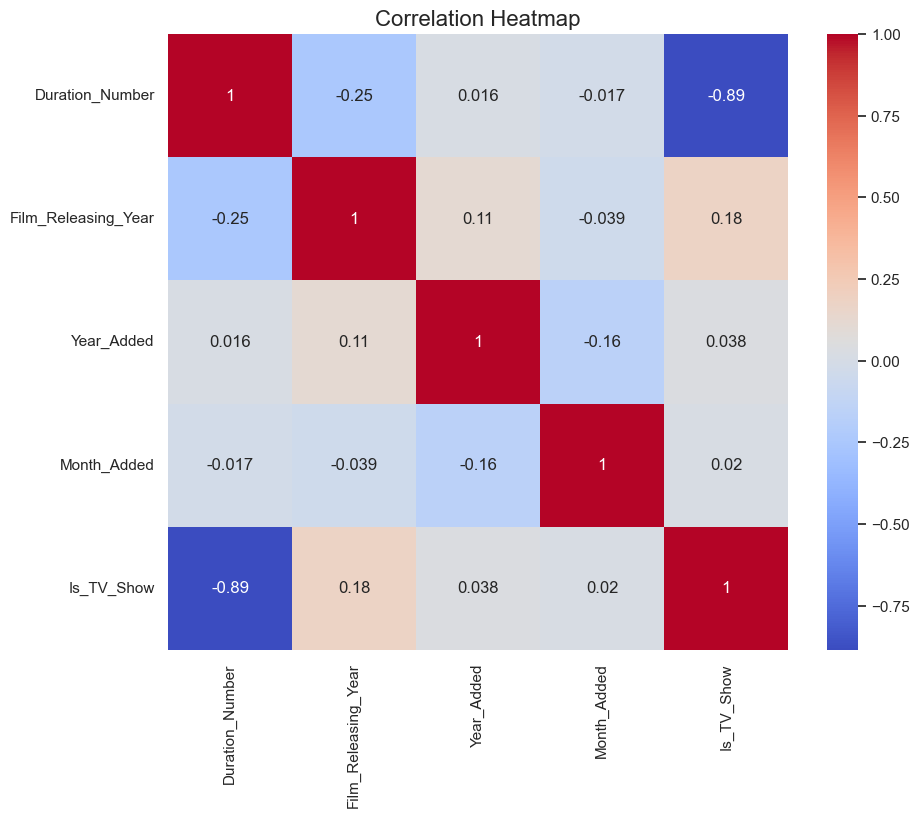

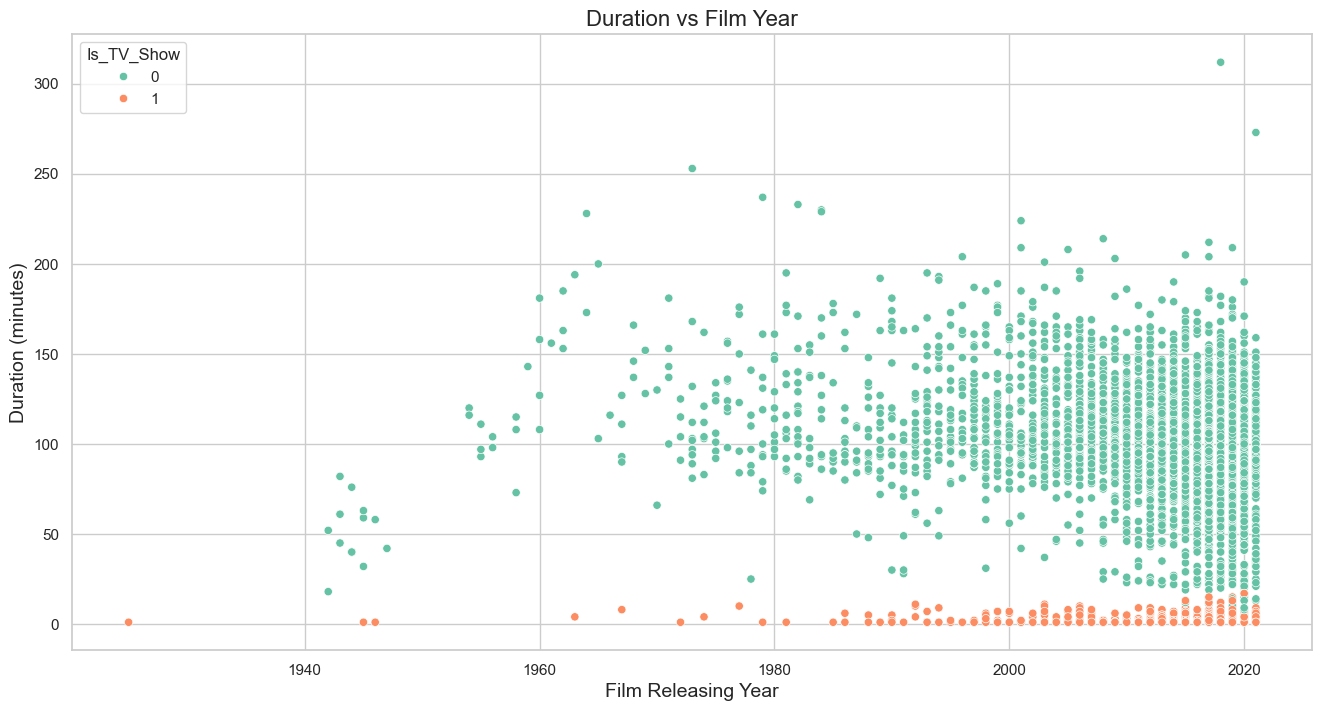

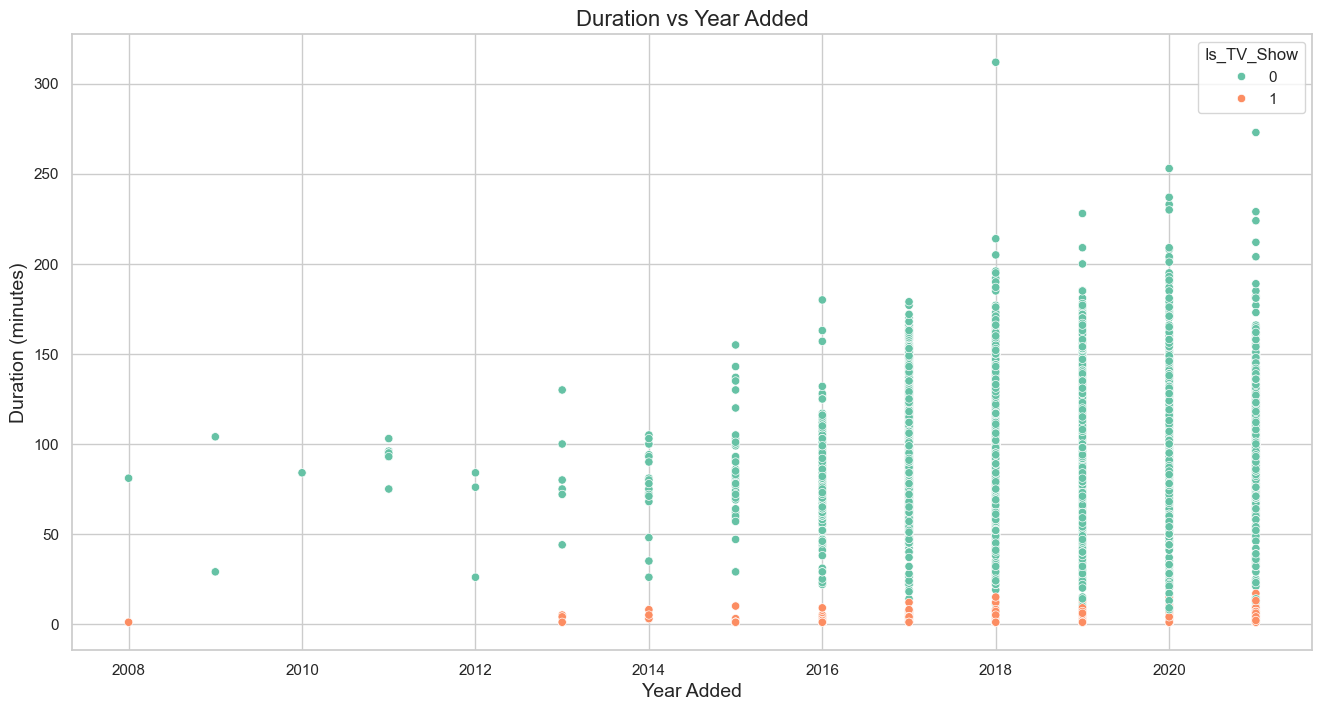

In [39]:
# 1. Correlation Heatmap
# -------------------------------
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('Correlation.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# -------------------------------
# 2. Duration vs Film Releasing Year
# -------------------------------
plt.figure(figsize=(16,8))
sns.scatterplot(data=df, x='Film_Releasing_Year', y='Duration_Number', hue='Is_TV_Show', palette='Set2')
plt.title('Duration vs Film Year')
plt.xlabel('Film Releasing Year')
plt.ylabel('Duration (minutes)')
plt.savefig('Duration_vs_Film_Year.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# -------------------------------
# 3. Duration vs Year Added
# -------------------------------
plt.figure(figsize=(16,8))
sns.scatterplot(data=df, x='Year_Added', y='Duration_Number', hue='Is_TV_Show', palette='Set2')
plt.title('Duration vs Year Added')
plt.xlabel('Year Added')
plt.ylabel('Duration (minutes)')
plt.savefig('Duration_vs_Year_Added.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()